# Fetching data

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv(r'C:\Users\tnall\analytics\creditcard.csv')
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,...,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


# Data Analysis

In [3]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.graph_objs as go
import plotly
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
import matplotlib.gridspec as gridspec
from collections import Counter
import plotly.offline as py
py.init_notebook_mode(connected=True)

Checking for number of Fraud cases

In [4]:
fraud = len(df[df.Class == 1])
no_fraud = len(df[df.Class == 0])
total_trans = len(df['Class'])
fraud_ratio = fraud/total_trans
print('There are '+ str(fraud) + ' fraud')
print('The ratio of total fraud transaction is '+ str(fraud_ratio))

There are 492 fraud
The ratio of total fraud transaction is 0.001727485630620034


Data imbalance check as per target fraud class

Text(0, 0.5, 'Number of transctions')

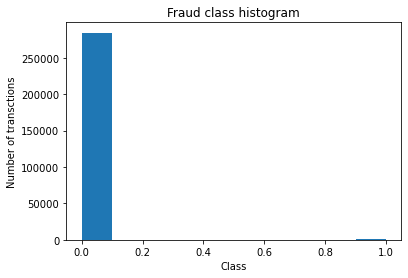

In [5]:
plt.hist(df['Class'])
plt.title("Fraud class histogram")
plt.xlabel("Class")
plt.ylabel("Number of transctions")

Fraud distribution in time and feature engineering

In [6]:
# converting seconds to time delta to extract hours and mins
time_conv = pd.to_timedelta(df['Time'], unit='s')
df['Time_in_hours'] = (time_conv.dt.components.hours).astype(int)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Time_in_hours
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0


Trasactions distribution in hours

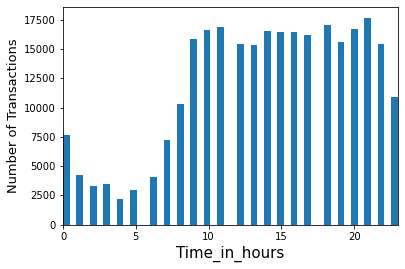

In [7]:
transactions = df['Time_in_hours']
plt.hist(transactions, bins = 50)
plt.xlim([min(transactions), max(transactions)])
plt.xlabel('Time_in_hours', fontsize=15)
plt.ylabel("Number of Transactions",  fontsize=13)

plt.show()

Amont of Fraud transactions distribution in hours

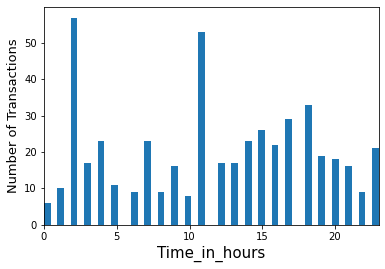

In [8]:
fraud_transactions = df.Time_in_hours[df.Class == 1]
plt.hist(fraud_transactions, bins = 50)
plt.xlim([min(fraud_transactions), max(fraud_transactions)])
plt.xlabel('Time_in_hours', fontsize=15)
plt.ylabel("Number of Transactions",  fontsize=13)

plt.show()

From the graph it is clear that the fraud rate was high at 2 & 11 am

Fraud ratio at each hour

In [9]:
fraudratio = df[['Time_in_hours','Class']].groupby('Time_in_hours').sum()/df[['Time_in_hours','Class']].groupby('Time_in_hours').count()
fraudratio.rename(columns={'Class':'fraudratio'}, inplace = True)
df = pd.merge(df,fraudratio,on='Time_in_hours')

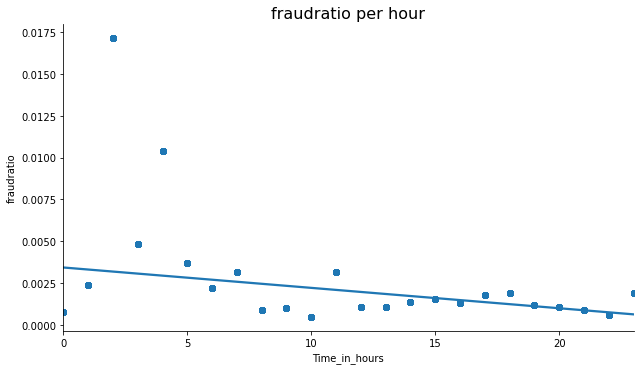

In [10]:
ax = sns.lmplot(x="Time_in_hours", y="fraudratio", aspect=1.8,
                data=df)
plt.title("fraudratio per hour", fontsize=16)

plt.show()

Fraud distribution in Amount

In [11]:
df['fraud_per_hour'] = df.Time_in_hours[df.Class == 1]

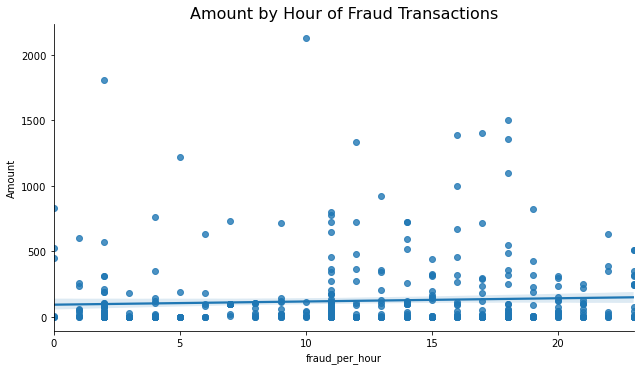

In [12]:
ax = sns.lmplot(y="Amount", x="fraud_per_hour", aspect=1.8,
                data=df)
plt.title("Amount by Hour of Fraud Transactions", fontsize=16)

plt.show()

# Skewness check and data normalization with sqrt and log method

In [13]:
df_skewtemp = df.drop(['Class'], axis=1)
df_skewtemp.skew()

Time              -0.035568
V1                -3.280667
V2                -4.624866
V3                -2.240155
V4                 0.676292
V5                -2.425901
V6                 1.826581
V7                 2.553907
V8                -8.521944
V9                 0.554680
V10                1.187141
V11                0.356506
V12               -2.278401
V13                0.065233
V14               -1.995176
V15               -0.308423
V16               -1.100966
V17               -3.844914
V18               -0.259880
V19                0.109192
V20               -2.037155
V21                3.592991
V22               -0.213258
V23               -5.875140
V24               -0.552499
V25               -0.415793
V26                0.576693
V27               -1.170209
V28               11.192091
Amount            16.977724
Time_in_hours     -0.490470
fraudratio         5.830461
fraud_per_hour    -0.096773
dtype: float64

In [14]:
df_skewed_sqrt = np.sqrt(df_skewtemp)
df_skewed_sqrt.skew()

c:\users\tnall\analytictask\venv\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning:

invalid value encountered in sqrt



Time             -0.597272
V1               -1.395362
V2                0.944320
V3               -0.092556
V4                0.800446
V5                1.018470
V6                0.722527
V7                1.660364
V8                1.475852
V9                0.616111
V10               1.274419
V11               0.106757
V12               0.019402
V13               0.133870
V14               0.587121
V15              -0.037325
V16               0.287640
V17               0.718106
V18               0.288601
V19               0.531125
V20               2.076510
V21               3.485339
V22              -0.019599
V23               2.752428
V24              -0.205358
V25               0.260450
V26               0.425818
V27               1.950617
V28               3.526752
Amount            2.822263
Time_in_hours    -1.610538
fraudratio        3.358459
fraud_per_hour   -0.630595
dtype: float64

In [15]:
df_skewed_sqrt.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Time_in_hours,fraudratio,fraud_per_hour
0,0.000000,NaN,NaN,1.592591,1.173949,NaN,0.679991,0.489488,0.314162,0.603148,...,NaN,0.258705,0.358524,NaN,0.365456,NaN,12.231925,0.0,0.027924,NaN
1,0.000000,1.091722,0.515898,0.408020,0.669443,0.244985,NaN,NaN,0.291722,NaN,...,0.318258,NaN,0.408865,0.354816,NaN,0.121343,1.640122,0.0,0.027924,NaN
2,1.000000,NaN,NaN,1.331619,0.616263,NaN,1.341827,0.889641,0.497670,NaN,...,0.953631,NaN,NaN,NaN,NaN,NaN,19.459188,0.0,0.027924,NaN
3,1.000000,NaN,NaN,1.339027,NaN,NaN,1.116783,0.487451,0.614358,NaN,...,NaN,NaN,0.804597,NaN,0.250445,0.247906,11.113055,0.0,0.027924,NaN
4,1.414214,NaN,0.936876,1.244475,0.634850,NaN,0.309712,0.770026,NaN,0.904289,...,NaN,0.375855,NaN,0.708726,0.468425,0.463846,8.366003,0.0,0.027924,NaN


In [16]:
df_skewed_log = np.log(df_skewtemp)
df_skewed_log.skew()

c:\users\tnall\analytictask\venv\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning:

divide by zero encountered in log

c:\users\tnall\analytictask\venv\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning:

invalid value encountered in log



Time                   NaN
V1               -3.035317
V2               -1.318566
V3               -1.603961
V4               -1.131153
V5               -1.136297
V6               -0.931294
V7               -1.220334
V8               -0.998367
V9               -1.274661
V10              -1.085637
V11              -1.719891
V12              -1.673093
V13              -1.552016
V14              -1.308361
V15              -1.682026
V16              -1.460810
V17              -1.251839
V18              -1.372486
V19              -1.240433
V20              -0.605549
V21              -0.811133
V22              -1.658852
V23              -0.824313
V24              -1.530050
V25              -1.673481
V26              -1.019660
V27              -0.712096
V28              -0.650381
Amount                 NaN
Time_in_hours          NaN
fraudratio        1.109685
fraud_per_hour         NaN
dtype: float64

In [17]:
df_skewed_log.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Time_in_hours,fraudratio,fraud_per_hour
0,-inf,NaN,NaN,0.930725,0.320746,NaN,-0.771351,-1.428790,-2.315692,-1.011187,...,NaN,-2.704137,-2.051520,NaN,-2.013217,NaN,5.008099,-inf,-7.156567,NaN
1,-inf,0.175513,-1.323693,-1.792879,-0.802618,-2.813117,NaN,NaN,-2.463909,NaN,...,-2.289787,NaN,-1.788742,-2.072311,NaN,-4.218265,0.989541,-inf,-7.156567,NaN
2,0.000000,NaN,NaN,0.572791,-0.968164,NaN,0.588064,-0.233875,-1.395635,NaN,...,-0.094957,NaN,NaN,NaN,NaN,NaN,5.936639,-inf,-7.156567,NaN
3,0.000000,NaN,NaN,0.583886,NaN,NaN,0.220904,-1.437129,-0.974355,NaN,...,NaN,NaN,-0.434828,NaN,-2.769029,-2.789407,4.816241,-inf,-7.156567,NaN
4,0.693147,NaN,-0.130409,0.437427,-0.908735,NaN,-2.344226,-0.522661,NaN,-0.201212,...,NaN,-1.957104,NaN,-0.688573,-1.516757,-1.536405,4.248352,-inf,-7.156567,NaN


since both log and sqrt methods return NAN values for data transformation normalization methods are suggested

# Data balancing

In [18]:
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN

In [19]:
X = df.drop(['Class','fraud_per_hour'], axis=1)
Y = df['Class']

In [20]:
ada = ADASYN(random_state=2)
X_ada, Y_ada = ada.fit_resample(X,Y)

# Feature normalization 

In [21]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [22]:
X_stand = pd.DataFrame(StandardScaler().fit_transform(X_ada), columns=X_ada.columns, index=X_ada.index)

In [23]:
X_minmax = pd.DataFrame(MinMaxScaler().fit_transform(X_ada), columns=X_ada.columns, index=X_ada.index)

correlation between all variables

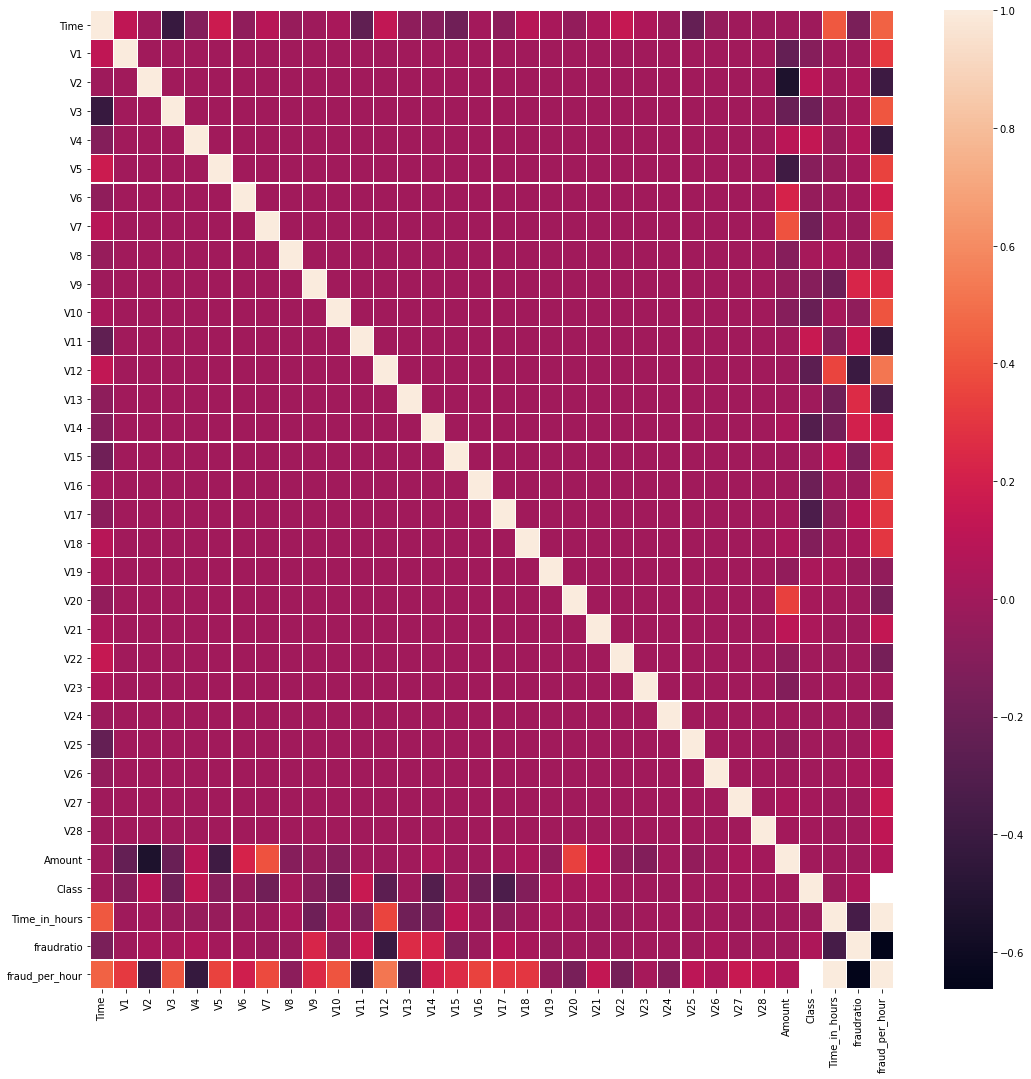

In [24]:
plt.figure(figsize=(18, 18))
fig = sns.heatmap(df.corr(),linewidths=.1)
plt.show()

Variable correlation with class

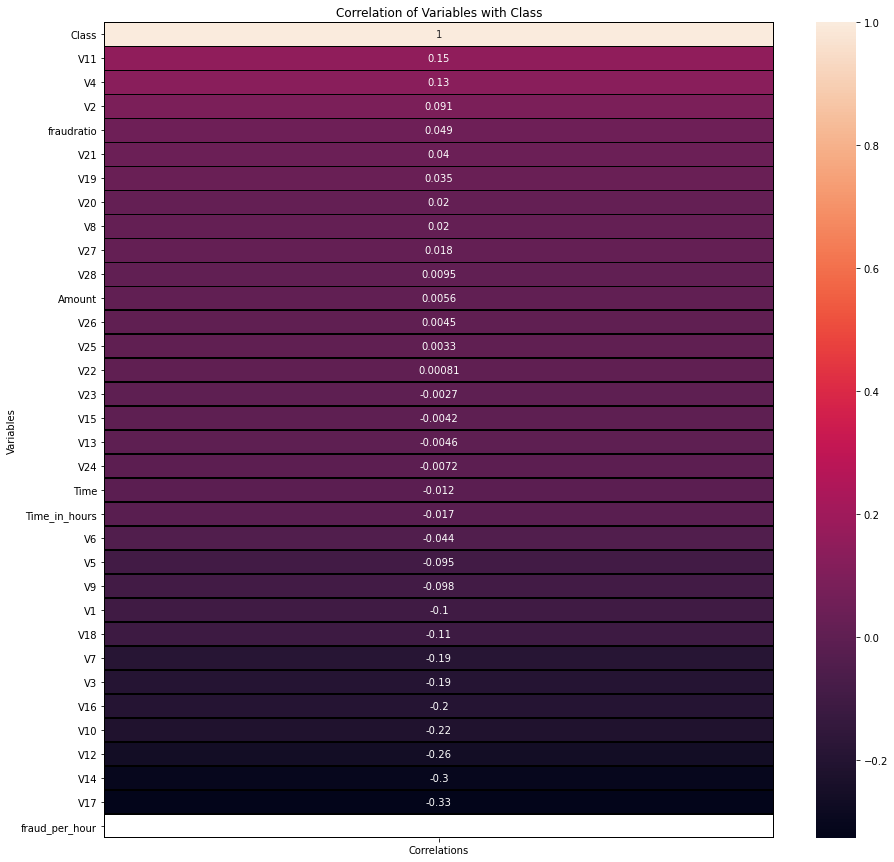

In [25]:
rel = df.corrwith(df['Class']).reset_index()

rel.columns = ['Variables','Correlations']
rel = rel.set_index('Variables')
rel = rel.sort_values(by=['Correlations'], ascending = False)

plt.figure(figsize=(15, 15))
fig = sns.heatmap(rel, annot=True, linewidths=0.4, linecolor='black')

plt.title("Correlation of Variables with Class")
plt.show()

V10,V12,V14,V17 has high negative correlation
V11,V4,V2,V21 ga high positive correlation

# Feature selection 

In [26]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Ridge
from sklearn.linear_model import LassoCV

Ridge method

In [27]:
feature_names = X_stand.columns
clf = Ridge().fit(X_stand, Y_ada)
importance = np.abs(clf.coef_)
print(importance)

idx_third = importance.argsort()[-1]
threshold = importance[idx_third] + 0.01

idx_features = (-importance).argsort()[:20]
name_features = np.array(feature_names)[idx_features]
print('Selected features: {}'.format(name_features))
model = SelectFromModel(clf, prefit=True, threshold='mean')
X_new_stand = model.transform(X_stand)
n_features = model.transform(X_stand).shape[1]

[0.02740108 0.07149769 0.03657123 0.04857878 0.16760687 0.05750253
 0.02798245 0.10141025 0.0634256  0.02534647 0.08951194 0.02281305
 0.03740704 0.02846813 0.2548774  0.00843447 0.01853165 0.06352563
 0.07874827 0.02471916 0.00366994 0.0466534  0.0343879  0.02701527
 0.00895484 0.00172367 0.03249461 0.00687876 0.02776174 0.02700168
 0.01941126 0.00126995]
Selected features: ['V14' 'V4' 'V7' 'V10' 'V18' 'V1' 'V17' 'V8' 'V5' 'V3' 'V21' 'V12' 'V2'
 'V22' 'V26' 'V13' 'V6' 'V28' 'Time' 'V23']


In [28]:
feature_names = X_minmax.columns
clf = Ridge().fit(X_minmax, Y_ada)
importance = np.abs(clf.coef_)
print(importance)

idx_third = importance.argsort()[-1]
threshold = importance[idx_third] + 0.01

idx_features = (-importance).argsort()[:20]
name_features = np.array(feature_names)[idx_features]
print('Selected features: {}'.format(name_features))
model = SelectFromModel(clf, prefit=True, threshold='mean')
X_new_minmax = model.transform(X_minmax)
n_features = model.transform(X_minmax).shape[1]

[0.09522083 0.85403782 0.95561204 0.49331766 1.24502259 2.1298788
 1.7091959  3.27095681 1.57576291 0.34100755 1.06802889 0.14499242
 0.23161765 0.37139106 1.73803218 0.12047845 0.18316738 0.40170299
 0.53595535 0.27797884 0.43381598 1.54162218 0.78858833 1.96087128
 0.12441351 0.04852867 0.44589338 0.42216808 3.25610431 2.84993605
 0.07014002 0.00596156]
Selected features: ['V7' 'V28' 'Amount' 'V5' 'V23' 'V14' 'V6' 'V8' 'V21' 'V4' 'V10' 'V2' 'V1'
 'V22' 'V18' 'V3' 'V26' 'V20' 'V27' 'V17']


Lassocv

In [29]:
feature_names = X_stand.columns
clf = LassoCV().fit(X_stand, Y_ada)
importance = np.abs(clf.coef_)
print(importance)
idx_third = importance.argsort()[-1]
threshold = importance[idx_third] + 0.01

idx_features = (-importance).argsort()[:20]
name_features = np.array(feature_names)[idx_features]
print('Selected features: {}'.format(name_features))
model = SelectFromModel(clf, prefit=True, threshold='mean')
X_new_lstand = model.transform(X_stand)
n_features = model.transform(X_stand).shape[1]

[0.         0.         0.         0.         0.10927693 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.24294184 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.        ]
Selected features: ['V14' 'V4' 'Time' 'Amount' 'V28' 'V27' 'V26' 'V25' 'V24' 'V23' 'V22'
 'V21' 'V20' 'V19' 'V18' 'V17' 'V15' 'Time_in_hours' 'V13' 'V12']


In [30]:
feature_names = X_minmax.columns
clf = LassoCV().fit(X_minmax, Y_ada)
importance = np.abs(clf.coef_)
print(importance)
idx_third = importance.argsort()[-1]
threshold = importance[idx_third] + 0.01

idx_features = (-importance).argsort()[:20]
name_features = np.array(feature_names)[idx_features]
print('Selected features: {}'.format(name_features))
model = SelectFromModel(clf, prefit=True, threshold='mean')
X_new_lminmax = model.transform(X_minmax)
n_features = model.transform(X_minmax).shape[1]

[0.00423274 0.18617444 0.         0.         1.06607652 0.
 0.         0.         0.23746259 0.         0.         0.
 0.         0.36774769 1.97453083 0.         0.         0.
 0.22222013 0.01437696 0.         0.         0.         0.
 0.         0.         0.36835426 0.         0.         0.
 0.00988956 0.        ]
Selected features: ['V14' 'V4' 'V26' 'V13' 'V8' 'V18' 'V1' 'V19' 'Time_in_hours' 'Time' 'V23'
 'V22' 'V21' 'V27' 'V28' 'Amount' 'V20' 'V25' 'V24' 'V15']


# Data preprocessing for skewed data with log method

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X_new_stand, Y_ada, test_size=0.3, random_state=0)

In [33]:
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X_new_minmax, Y_ada, test_size=0.3, random_state=0)

In [34]:
X_train3, X_test3, Y_train3, Y_test3 = train_test_split(X_new_lstand, Y_ada, test_size=0.3, random_state=0)

In [35]:
X_train4, X_test4, Y_train4, Y_test4 = train_test_split(X_new_lminmax, Y_ada, test_size=0.3, random_state=0)

# Model

In [36]:
#Importing librairies

import pandas as pd 
import numpy as np

# Scikit-learn library: For SVM
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix,classification_report
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint

import itertools

# Matplotlib library to plot the charts
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

# Library for the statistic data vizualisation
import seaborn

%matplotlib inline

In [37]:
class_names=np.array(['0','1'])
# Function to plot the confusion Matrix
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd' 
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# SVM Model

In [38]:
clf = svm.SVC()
clf.fit(X_train1, Y_train1)
clf.score(X_train1, Y_train1)

0.9803959008011979

In [39]:
prediction_SVM = clf.predict(X_test1)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     85136
           1       0.99      0.97      0.98     85448

    accuracy                           0.98    170584
   macro avg       0.98      0.98      0.98    170584
weighted avg       0.98      0.98      0.98    170584



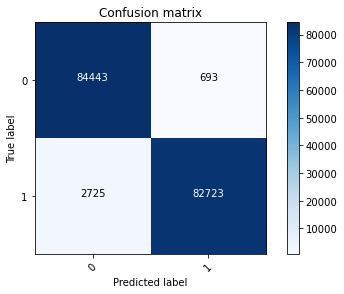

In [40]:
cm = confusion_matrix(Y_test1, prediction_SVM)
plot_confusion_matrix(cm,class_names)
print(classification_report(Y_test1,prediction_SVM))

In [41]:
clf = svm.SVC()
clf.fit(X_train2, Y_train2)
clf.score(X_train2, Y_train2)

0.9661909056877765

In [42]:
prediction_SVM = clf.predict(X_test2)

              precision    recall  f1-score   support

           0       0.95      0.98      0.97     85136
           1       0.98      0.95      0.97     85448

    accuracy                           0.97    170584
   macro avg       0.97      0.97      0.97    170584
weighted avg       0.97      0.97      0.97    170584



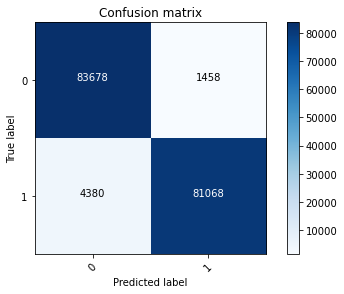

In [43]:
cm = confusion_matrix(Y_test1, prediction_SVM)
plot_confusion_matrix(cm,class_names)
print(classification_report(Y_test2,prediction_SVM))

In [44]:
clf = svm.SVC()
clf.fit(X_train3, Y_train3)
clf.score(X_train3, Y_train3)

0.9592492004351442

In [45]:
prediction_SVM = clf.predict(X_test3)

              precision    recall  f1-score   support

           0       0.94      0.98      0.96     85136
           1       0.98      0.94      0.96     85448

    accuracy                           0.96    170584
   macro avg       0.96      0.96      0.96    170584
weighted avg       0.96      0.96      0.96    170584



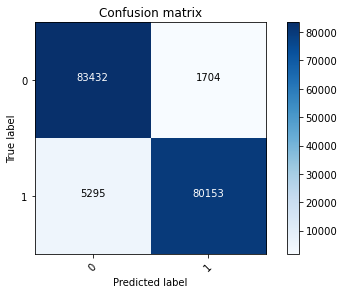

In [46]:
cm = confusion_matrix(Y_test3, prediction_SVM)
plot_confusion_matrix(cm,class_names)
print(classification_report(Y_test3,prediction_SVM))

In [47]:
clf = svm.SVC()
clf.fit(X_train4, Y_train4)
clf.score(X_train4, Y_train4)

0.967876712500848

In [48]:
prediction_SVM = clf.predict(X_test4)

              precision    recall  f1-score   support

           0       0.95      0.98      0.97     85136
           1       0.98      0.95      0.97     85448

    accuracy                           0.97    170584
   macro avg       0.97      0.97      0.97    170584
weighted avg       0.97      0.97      0.97    170584



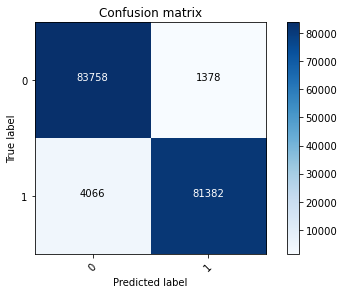

In [49]:
cm = confusion_matrix(Y_test4, prediction_SVM)
plot_confusion_matrix(cm,class_names)
print(classification_report(Y_test4,prediction_SVM))

# Logistic regression

In [50]:
cllr = LogisticRegression()
cllr.fit(X_train1, Y_train1)
cllr.score(X_train1, Y_train1)

0.9678390268045796

In [51]:
prediction_lr = cllr.predict(X_test1)

              precision    recall  f1-score   support

           0       0.95      0.99      0.97     85136
           1       0.99      0.95      0.97     85448

    accuracy                           0.97    170584
   macro avg       0.97      0.97      0.97    170584
weighted avg       0.97      0.97      0.97    170584



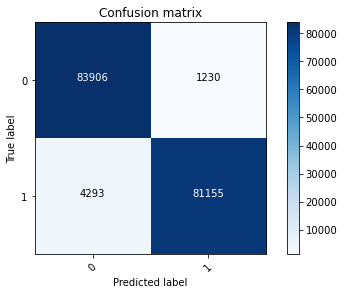

In [52]:
cm = confusion_matrix(Y_test1, prediction_lr)
plot_confusion_matrix(cm,class_names)
print(classification_report(Y_test1,prediction_lr))

In [53]:
cllr = LogisticRegression()
cllr.fit(X_train2, Y_train2)
cllr.score(X_train2, Y_train2)

c:\users\tnall\analytictask\venv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



0.9633870898854103

In [54]:
prediction_lr = cllr.predict(X_test2)

              precision    recall  f1-score   support

           0       0.95      0.98      0.96     85136
           1       0.98      0.95      0.96     85448

    accuracy                           0.96    170584
   macro avg       0.96      0.96      0.96    170584
weighted avg       0.96      0.96      0.96    170584



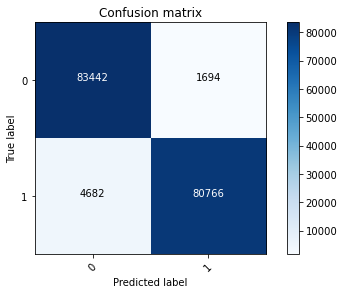

In [55]:
cm = confusion_matrix(Y_test2, prediction_lr)
plot_confusion_matrix(cm,class_names)
print(classification_report(Y_test2,prediction_lr))

In [56]:
cllr = LogisticRegression()
cllr.fit(X_train3, Y_train3)
cllr.score(X_train3, Y_train3)

0.9562494190121825

In [57]:
prediction_lr = cllr.predict(X_test3)

              precision    recall  f1-score   support

           0       0.94      0.97      0.96     85136
           1       0.97      0.94      0.95     85448

    accuracy                           0.96    170584
   macro avg       0.96      0.96      0.96    170584
weighted avg       0.96      0.96      0.96    170584



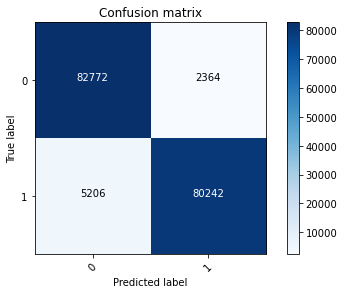

In [58]:
cm = confusion_matrix(Y_test1, prediction_lr)
plot_confusion_matrix(cm,class_names)
print(classification_report(Y_test3,prediction_lr))

In [59]:
cllr = LogisticRegression()
cllr.fit(X_train4, Y_train4)
cllr.score(X_train4, Y_train4)

0.9607817520833909

In [60]:
prediction_lr = cllr.predict(X_test4)

              precision    recall  f1-score   support

           0       0.94      0.98      0.96     85136
           1       0.98      0.94      0.96     85448

    accuracy                           0.96    170584
   macro avg       0.96      0.96      0.96    170584
weighted avg       0.96      0.96      0.96    170584



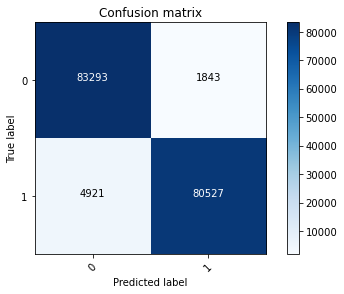

In [61]:
cm = confusion_matrix(Y_test4, prediction_lr)
plot_confusion_matrix(cm,class_names)
print(classification_report(Y_test4,prediction_lr))

# Random forest

In [62]:
clrf = RandomForestClassifier(max_depth=5,
           n_estimators=300)
clrf.fit(X_train1, Y_train1)
clrf.score(X_train1, Y_train1)

0.967507392677418

In [63]:
prediction_rf = clrf.predict(X_test1)

              precision    recall  f1-score   support

           0       0.95      0.99      0.97     85136
           1       0.99      0.94      0.97     85448

    accuracy                           0.97    170584
   macro avg       0.97      0.97      0.97    170584
weighted avg       0.97      0.97      0.97    170584



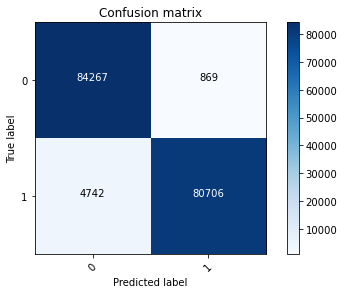

In [64]:
cm = confusion_matrix(Y_test1, prediction_rf)
plot_confusion_matrix(cm,class_names)
print(classification_report(Y_test1,prediction_rf))

In [65]:
clrf = RandomForestClassifier(max_depth=5,
           n_estimators=300)
clrf.fit(X_train2, Y_train2)
clrf.score(X_train2, Y_train2)

0.9662939132575767

In [66]:
prediction_rf = clrf.predict(X_test2)

              precision    recall  f1-score   support

           0       0.95      0.99      0.97     85136
           1       0.99      0.94      0.97     85448

    accuracy                           0.97    170584
   macro avg       0.97      0.97      0.97    170584
weighted avg       0.97      0.97      0.97    170584



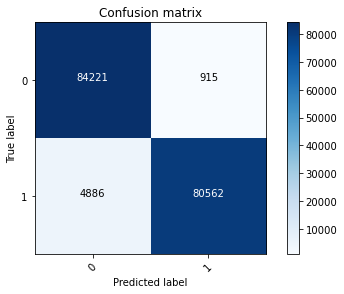

In [67]:
cm = confusion_matrix(Y_test2, prediction_rf)
plot_confusion_matrix(cm,class_names)
print(classification_report(Y_test2,prediction_rf))

In [68]:
clrf = RandomForestClassifier(max_depth=5,
           n_estimators=300)
clrf.fit(X_train3, Y_train3)
clrf.score(X_train3, Y_train3)

0.9608244625391618

In [69]:
prediction_rf = clrf.predict(X_test3)

              precision    recall  f1-score   support

           0       0.95      0.97      0.96     85136
           1       0.97      0.95      0.96     85448

    accuracy                           0.96    170584
   macro avg       0.96      0.96      0.96    170584
weighted avg       0.96      0.96      0.96    170584



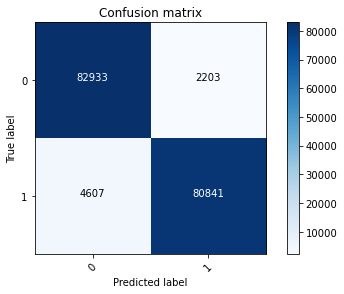

In [70]:
cm = confusion_matrix(Y_test3, prediction_rf)
plot_confusion_matrix(cm,class_names)
print(classification_report(Y_test3,prediction_rf))

In [71]:
clrf = RandomForestClassifier(max_depth=5,
           n_estimators=300)
clrf.fit(X_train4, Y_train4)
clrf.score(X_train4, Y_train4)

0.9646583540395298

In [72]:
prediction_rf = clrf.predict(X_test4)

              precision    recall  f1-score   support

           0       0.95      0.98      0.96     85136
           1       0.98      0.95      0.96     85448

    accuracy                           0.96    170584
   macro avg       0.96      0.96      0.96    170584
weighted avg       0.96      0.96      0.96    170584



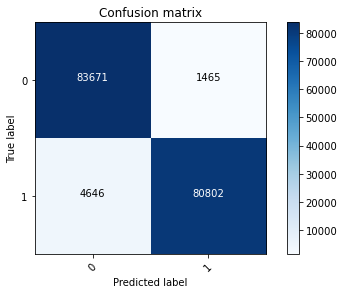

In [73]:
cm = confusion_matrix(Y_test4, prediction_rf)
plot_confusion_matrix(cm,class_names)
print(classification_report(Y_test4,prediction_rf))

#The process begain with data analysis and skewness is checked. Methods Log and SQRT are applied on the data set to eliminate the skewness in data but the results have NAN values hence Normalization methods standardscaler and Minmaxscaler are choosed. Data balancing is done using ADASYN method.

#After data normalization feature selection is performed using Lassocv and Ridge and train,test sets are splited.
#SVM, Random forest and Logesticregression methods are used to develope the model with metrics like confusion matrix,F1score,Accuracy and precision

#These methods are implemented for all the splited data sets. The result is SVM classifier using, ADASYN,Standardscalar and Ridgehas the highest F1 score of 0.98 and detected more frauds.

# Hence the best pipe line for balanced data using ADASYN is Feature extraction, Data balancing with ADASYN Data normalization with StandardScalar, Feature selection using Ridge, SVM classifiers


# Overal the best pipeline for this data set is

Data loading, explanatory data analysis, feature extraction, Data balancing using SMOTE, Data normalization using Standardscaler, Feature selection with Ridge method and SVM classifier

Using skewness elimination methods like Log & SQRT is not suitable for this data set because the results contains so many NAN values.